# Correction d'exercice

## 1. Centrer et réduire les données $ X \rightarrow Z $

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Création du DataFrame
data = {
    'Fournisseur': ['E1', 'E2', 'E3', 'E4'],
    'Service': [-2, -1, 2, 1],
    'Qualité': [3, 1, -1, -3],
    'Prix': [-1, 0, -1, 2]
}
df = pd.DataFrame(data)

# Centrer et réduire les données
scaler = StandardScaler()
df[['Service', 'Qualité', 'Prix']] = scaler.fit_transform(df[['Service', 'Qualité', 'Prix']])

print(df)


  Fournisseur   Service   Qualité      Prix
0          E1 -1.264911  1.341641 -0.816497
1          E2 -0.632456  0.447214  0.000000
2          E3  1.264911 -0.447214 -0.816497
3          E4  0.632456 -1.341641  1.632993


## 2. Calculer la matrice de covariance $ \boldsymbol{\Sigma} $

In [5]:
# Calcul de la matrice de variance-covariance
cov_matrix = np.cov(df[['Service', 'Qualité', 'Prix']].T, ddof=0)  # ddof=0 pour utiliser n dans la division

# Affichage de la matrice de variance-covariance
print("\nMatrice de variance-covariance :")
print(cov_matrix)



Matrice de variance-covariance :
[[ 1.         -0.84852814  0.25819889]
 [-0.84852814  1.         -0.73029674]
 [ 0.25819889 -0.73029674  1.        ]]


## 3. Diagonaliser $ \boldsymbol{\Sigma} $ pour obtenir $ \left\{\left(\boldsymbol{u}_{k}, \lambda_{k}\right)\right\}_{k=1, \ldots, 3} $ (indication une valeur propre est nulle).

In [7]:
# Calculer les valeurs propres et les vecteurs propres de la matrice de variance-covariance
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Trier les valeurs propres et les vecteurs propres dans l'ordre décroissant des valeurs propres
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Afficher les valeurs propres arrondies à 2 décimales
print("Valeurs propres :\n", np.round(eigenvalues, 2))

# Afficher les vecteurs propres arrondis à 2 décimales
print("Vecteurs propres :\n", np.round(eigenvectors, 2))


Valeurs propres :
 [ 2.25  0.75 -0.  ]
Vecteurs propres :
 [[-0.55  0.65  0.53]
 [ 0.67 -0.04  0.75]
 [-0.5  -0.76  0.41]]


## 4. Choisir le nombre $ k_{0} $ d'axes à retenir avec justification sur le pourcentage de perte d'information.

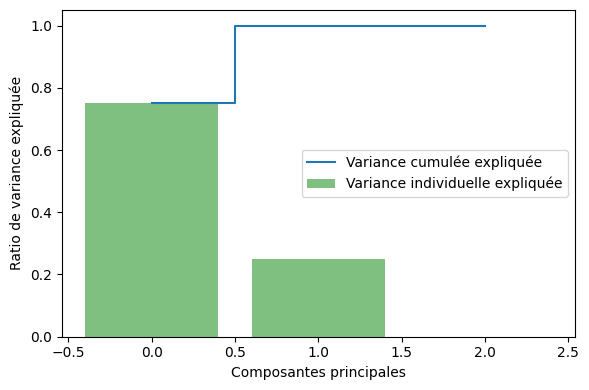

In [9]:
import matplotlib.pyplot as plt

# Calculer le pourcentage de variance expliquée par chaque valeur propre
variance_explained = eigenvalues / np.sum(eigenvalues)

# Calculer le pourcentage cumulé de variance expliquée
cumulative_variance_explained = np.cumsum(variance_explained)

# Tracer le pourcentage de variance expliquée
plt.figure(figsize=(6, 4))
plt.bar(range(len(eigenvalues)), variance_explained, alpha=0.5,
        align='center', label='Variance individuelle expliquée', color='g')
plt.step(range(len(eigenvalues)), cumulative_variance_explained, where='mid',
         label='Variance cumulée expliquée')
plt.ylabel('Ratio de variance expliquée')
plt.xlabel('Composantes principales')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


## 5. Orthonormaliser les vecteurs propres choisis (utiliser l'annexe).

In [1]:
eigenvectors

NameError: name 'eigenvectors' is not defined

In [10]:
import numpy as np

# Les deux premiers vecteurs propres que vous avez choisis
v1 = np.array([-0.55, 0.67, -0.5])
v2 = np.array([0.65, -0.04, -0.76])

# Orthonormalisation en GramSchmidt
u1 = v1 / np.linalg.norm(v1)
u2 = v2 - np.dot(u1, v2) * u1
u2 = u2 / np.linalg.norm(u2)

print("Les vecteurs propres orthonormés sont :")
print("u1 =", np.round(u1, 2))
print("u2 =", np.round(u2, 2))


Les vecteurs propres orthonormés sont :
u1 = [-0.55  0.67 -0.5 ]
u2 = [ 0.65 -0.04 -0.76]


6. Calculer les composantes principales $ \left\{\boldsymbol{c}_{k}\right\}_{k=1, \ldots, k_{0}} $ avec le calcul de leur moyenne et de leur variance.

In [11]:
# Calculer les composantes principales
C1 = np.dot(df[['Service', 'Qualité', 'Prix']], u1)
C2 = np.dot(df[['Service', 'Qualité', 'Prix']], u2)

# Calculer la moyenne et la variance de chaque composante principale
mean_C1 = np.mean(C1)
var_C1 = np.var(C1)
mean_C2 = np.mean(C2)
var_C2 = np.var(C2)

print("La moyenne de la première composante principale C1 est :", np.round(mean_C1, 2))
print("La variance de la première composante principale C1 est :", np.round(var_C1, 2))
print("La moyenne de la deuxième composante principale C2 est :", np.round(mean_C2, 2))
print("La variance de la deuxième composante principale C2 est :", np.round(var_C2, 2))


La moyenne de la première composante principale C1 est : -0.0
La variance de la première composante principale C1 est : 2.25
La moyenne de la deuxième composante principale C2 est : -0.0
La variance de la deuxième composante principale C2 est : 0.75


## 7. Calculer la qualité de la représentation d'un individu en utilisant $COS^{2}$ et interpréter.

In [12]:
# Calculer les composantes principales pour chaque individu
df['C1'] = np.dot(df[['Service', 'Qualité', 'Prix']], u1)
df['C2'] = np.dot(df[['Service', 'Qualité', 'Prix']], u2)

# Calculer le carré de la norme de chaque individu
norms_squared = np.sum(df[['Service', 'Qualité', 'Prix']]**2, axis=1)

# Calculer le COS^2 pour chaque individu sur chaque axe
df['COS2_C1'] = df['C1']**2 / norms_squared
df['COS2_C2'] = df['C2']**2 / norms_squared

print(df[['Fournisseur', 'COS2_C1', 'COS2_C2']])


  Fournisseur   COS2_C1   COS2_C2
0          E1  0.985032  0.014943
1          E2  0.697748  0.302242
2          E3  0.139536  0.860464
3          E4  0.873500  0.126465


## 8. Représenter les individus dans le(s) repère(s) des axes principaux et interpréter.

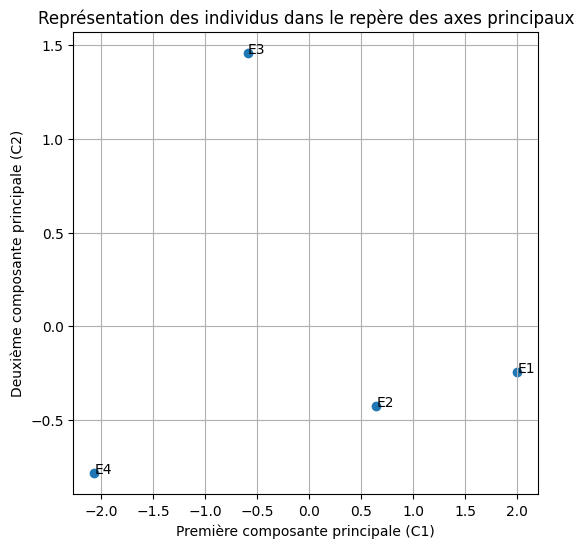

In [13]:
import matplotlib.pyplot as plt

# Créer un graphique de dispersion des individus
plt.figure(figsize=(6, 6))
plt.scatter(df['C1'], df['C2'])

# Ajouter des étiquettes aux points
for i in range(df.shape[0]):
    plt.text(df['C1'].iloc[i], df['C2'].iloc[i], df['Fournisseur'].iloc[i])

plt.xlabel('Première composante principale (C1)')
plt.ylabel('Deuxième composante principale (C2)')
plt.title('Représentation des individus dans le repère des axes principaux')
plt.grid(True)
plt.show()


## 9. Tracer les cercles de corrélation et interpréter.

C:\Users\bydevmar\AppData\Local\Temp\ipykernel_11480\2684025533.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.arrow(0, 0, correlations[i], correlations2[i], head_width=0.05, head_length=0.1, fc='red', ec='red')
C:\Users\bydevmar\AppData\Local\Temp\ipykernel_11480\2684025533.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(correlations[i], correlations2[i], df.columns[i], color='blue')


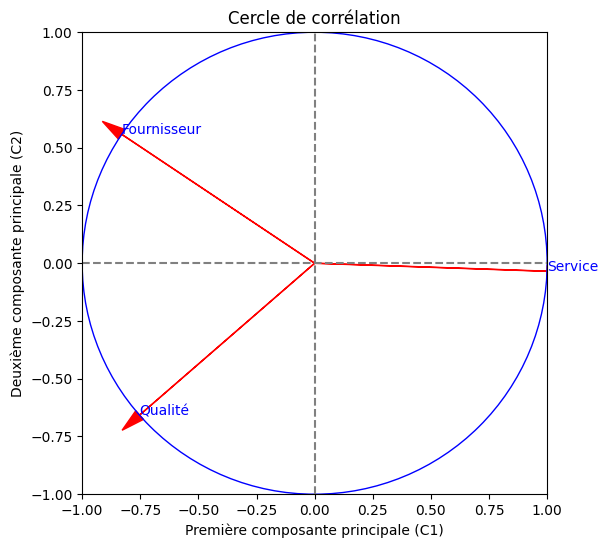

In [14]:
import matplotlib.pyplot as plt

# Calculer les corrélations entre les variables originales et les composantes principales
correlations = df[['Service', 'Qualité', 'Prix']].corrwith(df['C1'])
correlations2 = df[['Service', 'Qualité', 'Prix']].corrwith(df['C2'])

# Créer un cercle de corrélation
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.hlines(0, -1, 1, colors='grey', linestyles='dashed')
ax.vlines(0, -1, 1, colors='grey', linestyles='dashed')

# Ajouter les variables au cercle de corrélation
for i in range(len(correlations)):
    ax.arrow(0, 0, correlations[i], correlations2[i], head_width=0.05, head_length=0.1, fc='red', ec='red')
    ax.text(correlations[i], correlations2[i], df.columns[i], color='blue')

# Ajouter un cercle
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
ax.add_artist(circle)

plt.xlabel('Première composante principale (C1)')
plt.ylabel('Deuxième composante principale (C2)')
plt.title('Cercle de corrélation')
plt.show()
